# **1. Introdução**

No início do déculo XX, um médico inglês, Edward Jenner, descobriu as vacinas. Ele observou que vaqueiros que se contagiavam com uma versão mais leve da varíola, contraída do gado bovino, não eram expostos à doença transmitida por humanos. Após alguns testes, Jenner concretizou a hipótese de que,
ao receber uma certa dose do vírus, seus pacientes poderiam se proteger da doença. O nome “vacina” originouce do latim: “vaccinae”, que significa “vaca” [1](http://www.pcs.uem.br/drgenetica/dr-genetica-news/10a-edicao-jornal-dr-genetica-news).

A partir de então, a utilização das vacinas como forma de imunizar a população contra doenças imunopreveníveis vem sendo responsável pela eliminação e controle de inúmeras doenças em nosso país, e.g. a erradicação da varíola, a interrupção da transmissão da poliomielite, a eliminação do sarampo autóctone, e, há alguns anos, o Brasil não possui novos casos de rubéola. No Brasil, o Programa Nacional de Imunizações – PNI oferece, através do Sistema Único de Saúde – SUS, 44 tipos de imunobiológicos: 27 vacinas; 13 soros heterólogos (imunoglobulinas animais); e 4 soros homólogos (imunoglobulinas humanas). [2](https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf).

Neste projeto, iremos explorar o banco de dados das Coberturas Vacinais por Imuno, segundo Unidade da Federação, do período de 2009 à 2029, extraído do DATASUS no TabNet [3](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def). O Sistema de Avaliação do Programa de Imunizações - API coleta informações dos Boletins de Doses Aplicadas de Vacina. Por meio da Internet, o DATASUS, em conjunto com a CGPNI, disponibiliza as principais informações para tabulação sobre as Bases de Dados do Sistema de Avaliação do Programa de Imunizações - API. Para compreendermos os dados que serão avaliados, iremos recorrer a Descrição das variáveis disponíveis para tabulação, disponibilizado no DATASUS [[4](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf), [5](http://tabnet.datasus.gov.br/cgi/pni/%5Ccpnidescr.htm)].

# **2. Metodologia**

## **Importação de bibliotecas**

In [109]:
# Bibliotecas
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [110]:
# Graphic style
# sns.set()

## **Função de limpeza e organização dos dados**

In [111]:
def new_df(dados):

    '''
    Função que recebe um conjunto de dados em forma de csv para:
        
        - simplificar a coluna 'Unidade da Federação' em 'UF';
        - criar uma coluna indicando a região da UF;
        - eliminar os números dos nomes dos estados;
        - eliminar a coluna total;
        - substituir espaços vazios por '0' no df;
        
    Variável:
        dados: dataframe com a base de dados coletados do datasus. Ex.: pd.read_csv()
    '''

    # Colocando zeros no lugar das células sem valor
    dados.fillna(0, inplace=True)

    # Eliminando a coluna Total 
    dados = dados.drop('Total', axis=1)

    # Eliminando os números dos imunos
    new = dados.T
    new.index = [idx[4:] for idx in new.index]
    dados = new.T

    # Simplificando 'Unidade da Federação' para 'UF' 
    dados = dados.rename(columns={'ade da Federação':'uf'})

    # Criando a coluna da região de cada estado ao lado de 'uf'
    regiao_br = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul','5':'Centro-Oeste'}
    dados['regiao'] = [regiao_br[idx[0]] for idx in dados['uf']]
    dados = dados[np.roll(dados.columns,1)]

    # Eliminando os números da coluna UF
    dados['uf'] = [idx[3:] for idx in dados['uf']]

    dados.fillna(0, inplace=True)

    return dados

## **Importação do DataFrame**

Coberturas Vacinais por Imuno segundo Unidade de Federação. 

Período: 1994-2019

In [112]:
url1 = 'https://github.com/SaraZachi/programa-de-imuno-nacional/blob/main/Dados/CV_imunos.csv?raw=true'
df_imunos = pd.read_csv(url1,encoding = 'ISO-8859-1',
                    skiprows = 3, sep=';',skipfooter=20,
                    thousands = ".", decimal =',')
df_imunos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,11 Rondônia,105.11,77.44,61.92,60.80,91.29,87.89,89.21,96.58,0.03,92.06,69.82,86.41,88.72,80.30,102.28,83.98,73.95,90.75,3.84,79.65,86.23,25.12,53.88,39.87,83.29
1,12 Acre,105.54,60.09,49.50,50.59,74.94,64.19,64.09,88.50,1.87,76.83,47.95,58.36,61.40,61.16,89.16,54.17,48.82,70.37,4.94,60.67,69.04,11.12,28.64,20.42,67.15
2,13 Amazonas,107.99,74.39,49.73,55.81,72.97,73.35,71.17,83.79,0.18,80.30,61.01,74.57,77.86,71.68,86.94,69.89,62.40,73.76,4.17,67.25,72.68,19.29,47.39,40.24,72.01
3,14 Roraima,113.28,79.26,56.47,61.78,81.64,77.28,78.81,90.74,0.40,83.87,66.25,78.17,81.25,80.99,90.17,75.17,70.88,83.04,5.31,77.28,89.77,26.70,44.48,41.19,78.16
4,15 Pará,110.41,60.20,46.96,45.99,71.09,60.53,60.49,88.23,0.03,75.05,47.04,61.69,64.88,57.58,94.87,51.81,45.06,78.37,3.29,57.81,80.50,22.59,29.93,20.42,68.07


## **Exploração do Dataframe**

In [113]:
# Descobrindo as células vazias do primeiro DF
np.where(pd.isnull(df_imunos))
# [dados.iloc[i,j] for i,j in zip(*np.where(pd.isnull(dados)))]

(array([], dtype=int64), array([], dtype=int64))

In [114]:
# reconfigurando o DF1
df_imuno = new_df(df_imunos)
df_imuno.head()

,regiao,uf,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante
0,Norte,Rondônia,105.11,77.44,61.92,60.80,91.29,87.89,89.21,96.58,0.03,92.06,69.82,86.41,88.72,80.30,102.28,83.98,73.95,90.75,3.84,79.65,86.23,25.12,53.88,39.87
1,Norte,Acre,105.54,60.09,49.50,50.59,74.94,64.19,64.09,88.50,1.87,76.83,47.95,58.36,61.40,61.16,89.16,54.17,48.82,70.37,4.94,60.67,69.04,11.12,28.64,20.42
2,Norte,Amazonas,107.99,74.39,49.73,55.81,72.97,73.35,71.17,83.79,0.18,80.30,61.01,74.57,77.86,71.68,86.94,69.89,62.40,73.76,4.17,67.25,72.68,19.29,47.39,40.24
3,Norte,Roraima,113.28,79.26,56.47,61.78,81.64,77.28,78.81,90.74,0.40,83.87,66.25,78.17,81.25,80.99,90.17,75.17,70.88,83.04,5.31,77.28,89.77,26.70,44.48,41.19
4,Norte,Pará,110.41,60.20,46.96,45.99,71.09,60.53,60.49,88.23,0.03,75.05,47.04,61.69,64.88,57.58,94.87,51.81,45.06,78.37,3.29,57.81,80.50,22.59,29.93,20.42


  Repare que há mais de uma coluna para uma mesma vacina, e.g. a da Poliomielite. Analisando as notas sobre o banco de dados das Coberturas Vacinais disponibilizadas pelo DATASUS, compreendemos que a Cobertura Vacinal (CV) da Poliomielite registrada na coluna 'Poliomielite' refere-se a soma das doses aplicadas das vacinas com o mesmo componente em menores de 1 ano, a partir de 1994. As duas outras colunas são registros de Coberturas Vacinais das doses de reforço com a vacina oral bivalente – VOP (gotinha). A faixa etária é de menores de 1 ano, entre 1994 a 1999, e crianças de 0 a 4 anos, a partir de 2000.

  Vale ressaltar que a cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100. Exemplo: para a Tetravalente (DTP/Hib), considera-se o número de terceiras doses aplicadas na faixa etária de menores de 1 ano. Além disso, 'Totais' das vacinas contra poliomielite corresponde à soma da cobertura por poliomielite (VOP), poliomielite inativada (VIP) e hexavalente (HX) [[4](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf), [5](http://tabnet.datasus.gov.br/cgi/pni/%5Ccpnidescr.htm), [6](https://www.saude.pr.gov.br/Pagina/Poliomielite)].

In [115]:
df_polio = df_imuno[['uf', 'regiao', 'Poliomielite', 'Poliomielite(1º ref)', 'Poliomielite 4 anos']]
df_polio

,uf,regiao,Poliomielite,Poliomielite(1º ref),Poliomielite 4 anos
0,Rondônia,Norte,96.58,80.30,0.03
1,Acre,Norte,88.50,61.16,1.87
2,Amazonas,Norte,83.79,71.68,0.18
3,Roraima,Norte,90.74,80.99,0.40
4,Pará,Norte,88.23,57.58,0.03
5,Amapá,Norte,88.13,52.12,10.81
6,Tocantins,Norte,97.95,76.42,0.07
7,Maranhão,Nordeste,84.77,68.03,1.17
8,Piauí,Nordeste,88.01,66.88,0.29
9,Ceará,Nordeste,102.88,88.94,0.60


# **3. Resultados e discussão**

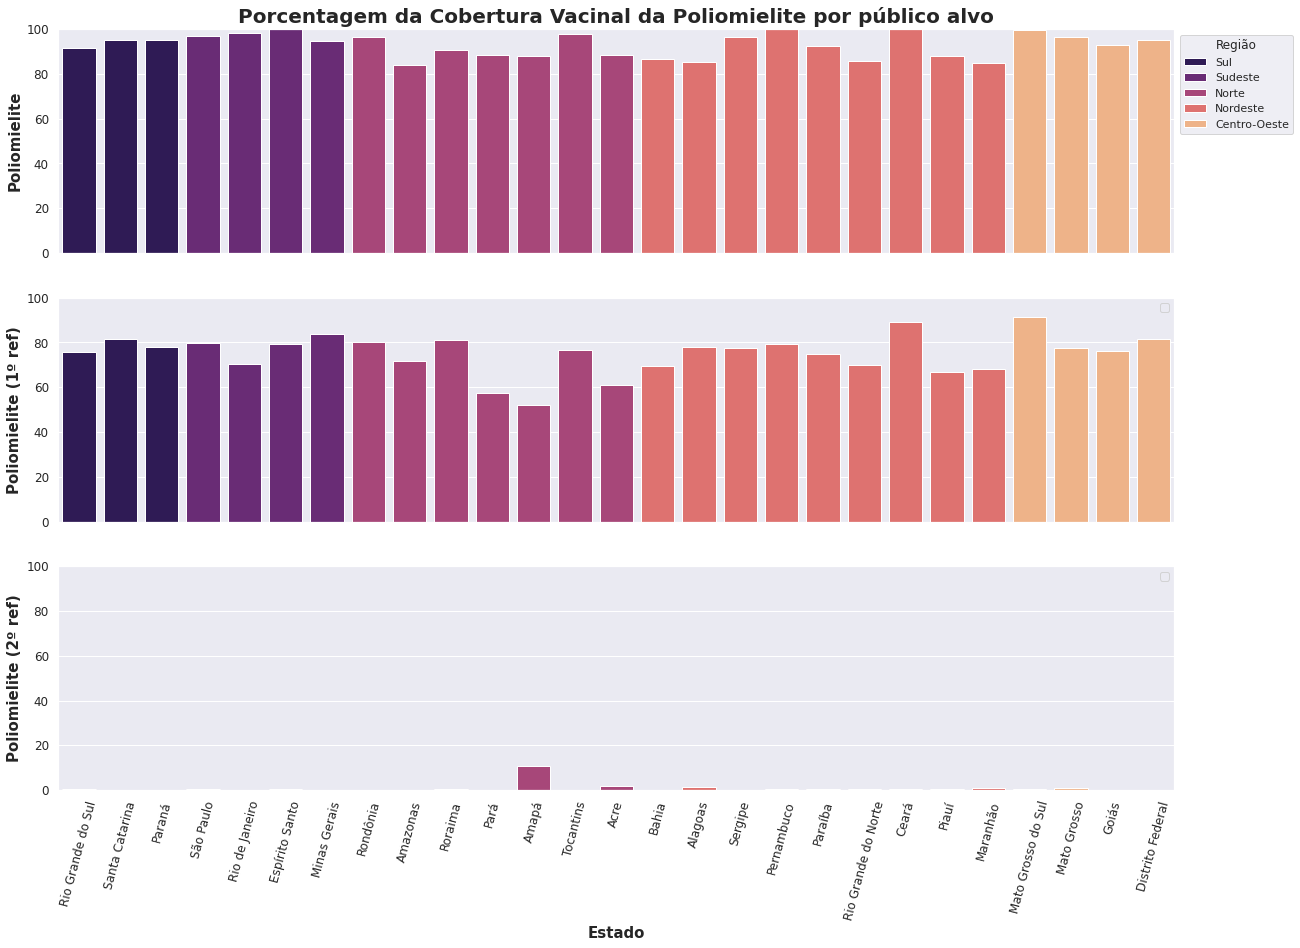

In [178]:
# Palheta de cores
sns.set_palette(sns.color_palette('magma', 5))
hue_order = ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']

# Criando figura e eixos
fig, ax = plt.subplots(3,1,figsize=(20,14), sharex=True)  

# Plot gráficos
sns.barplot(data= df_polio.sort_values(['regiao'], ascending=False), dodge=False, 
            x= 'uf', y='Poliomielite', hue='regiao', ax=ax[0])
sns.barplot(data= df_polio.sort_values(['regiao'], ascending=False), dodge=False, 
            x= 'uf', y='Poliomielite(1º ref)', hue='regiao', ax=ax[1])
sns.barplot(data= df_polio.sort_values(['regiao'], ascending=False), dodge=False, 
            x= 'uf', y='Poliomielite 4 anos', hue='regiao', ax=ax[2])

#Configurando eixos, títulos e legendas
plt.sca(ax[0])
plt.title('Porcentagem da Cobertura Vacinal da Poliomielite por público alvo', fontsize=20, fontweight = 'bold')
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Poliomielite', fontsize=15, fontweight = 'bold')

plt.sca(ax[1])
plt.title('')
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Poliomielite (1º ref)', fontsize=15, fontweight = 'bold')

plt.sca(ax[2])
plt.title('')
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Poliomielite (2º ref)', fontsize=15, fontweight = 'bold')

# handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(title='Região', bbox_to_anchor=(1, 1), loc=2)
ax[1].legend('')
ax[2].legend('')

plt.sca(ax[0])
plt.xlabel('')

plt.sca(ax[1])
plt.xlabel('')

plt.sca(ax[2])
plt.xticks(fontsize=12, rotation=75)
plt.xlabel('Estado', fontsize=15, fontweight = 'bold')


plt.show()

# **4. Conclusão**

# **Referências**

1. http://www.pcs.uem.br/drgenetica/dr-genetica-news/10a-edicao-jornal-dr-genetica-news
2. https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf
3. http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def
4. http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf
5. http://tabnet.datasus.gov.br/cgi/pni/%5Ccpnidescr.htm
6. https://www.saude.pr.gov.br/Pagina/Poliomielite